In [5]:
import os
import pytesseract
import cv2
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import re
import PIL

from PIL import Image

In [6]:
print(f'OpenCv2 {cv2.__version__}')
print(f'Tesseract {pytesseract.__version__}')
print(f'Matplotlib {matplotlib.__version__}')
print(f'Pillow {PIL.__version__}')

OpenCv2 4.7.0
Tesseract 0.3.10
Matplotlib 3.6.3
Pillow 9.4.0


- Install Tesseract OCR - Windows [Download Tesseract OCR on Windows](https://digi.bib.uni-mannheim.de/tesseract/?ref=nanonets.com) versão 5.3.0
- Install Tesseract OCR - Linux `sudo apt install tesseract-ocr -y`


In [7]:
pytesseract.get_languages(config='')

['eng', 'osd']

In [8]:
PATH_IMAGES = os.path.join('files')
TESSDATA_PREFIX = os.path.join(PATH_IMAGES)
WHITE_LIST = r'-c tessedit_char_whitelist=0123456789abcdefghijklmnopqstuvwxyzçABCDEFGHIJKLMNOPQRSTUVWXYZÇ@#$%&*()-_+:,.\s'

In [9]:
pytesseract_config = f'--tessdata-dir {TESSDATA_PREFIX} --psm 6'
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (4, 4))

In [77]:
img = cv2.imread(os.path.join(PATH_IMAGES, 'img2.jpg'))

# tipando a leitura para os canais de ordem RGB
# img_pill = Image.open(os.path.join(PATH_IMAGES, 'img2.jpg')).convert('RGB')

In [78]:
# convertendo em um array editável de numpy[x, y, canals]
# npimagem = np.asarray(img_pill).astype(np.uint8)

In [79]:
# npimagem[:, :, 0] = 0 # zerando o canal RED
# npimagem[:, :, 2] = 0 # zerando o canal BLUE

In [80]:
# im = cv2.cvtColor(npimagem, cv2.COLOR_RGB2GRAY)
# plt.figure(figsize=(10, 6))
# plt.imshow(im)

In [88]:
# aplicação da truncagem binária para a intensidade
# pixels de intensidade de cor abaixo de 127 serão convertidos para  0 (preto)
# _, thresh = cv2.threshold(im, 127, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
# plt.figure(figsize=(10, 6))
# plt.imshow(thresh)

In [89]:
# binimagem = Image.fromarray(thresh)
# plt.figure(figsize=(10, 6))
# plt.imshow(binimagem)

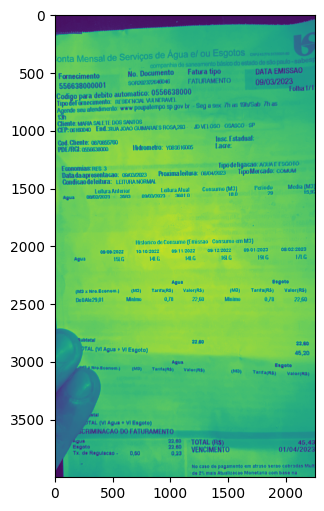

In [256]:
# imagem = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
guassian = cv2.GaussianBlur(gray, (5, 5), 0) 

plt.figure(figsize=(10, 6))
plt.imshow(guassian)

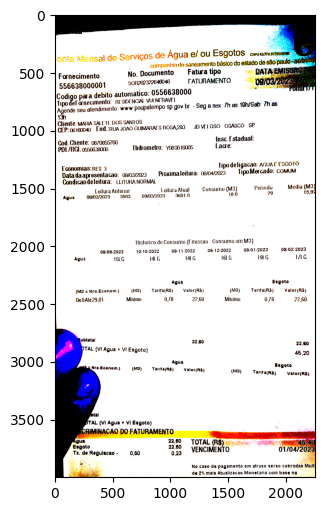

In [257]:
_, lim_simples = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
plt.figure(figsize=(10, 6))
plt.imshow(lim_simples)

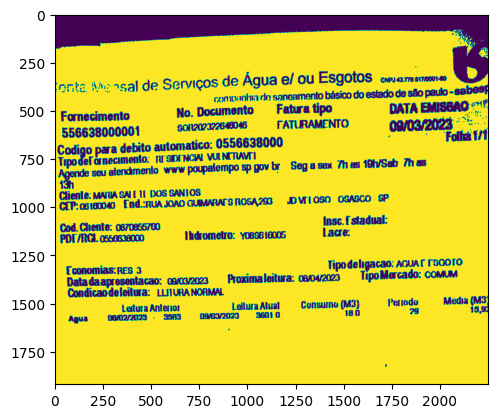

In [258]:
# img_resize = cv2.resize(guassian, (1024, 1024), interpolation=cv2.INTER_LINEAR)

_, lim_otsu = cv2.threshold(gray, 127, 255, cv2.THRESH_OTSU)
erosao = cv2.erode(lim_otsu, kernel)
img_crop = erosao[200:1920]
plt.imshow(img_crop)

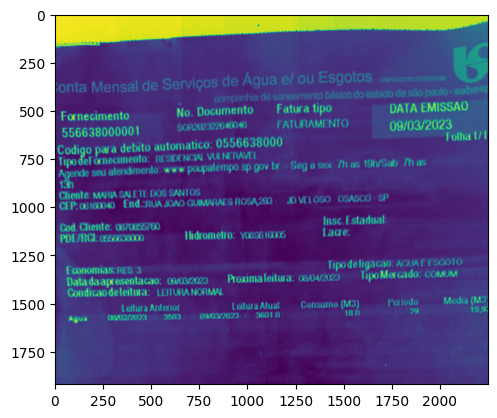

In [710]:
guassian = cv2.GaussianBlur(gray, (7, 7), 100) 
chapeu_preto = cv2.morphologyEx(guassian, cv2.MORPH_BLACKHAT, cv2.getStructuringElement(cv2.MORPH_RECT, (1920, 1920)))
img_crop = chapeu_preto[0:1920]
plt.imshow(img_crop)

In [711]:
texto = pytesseract.image_to_string(img_crop, lang='por', config=pytesseract_config)
print(texto)

naulo - sabeSfF
Fornecimento No. Documento Fatura tipo DATA EMISSAO
55663800000] SONAR 376A60 46 FATURAMENTO 09/03/2023
Codigo para debito automatico 0556638000 Folha 1/1
hpo(?ol ormecimento: AESIDENCIAL VULNERAVI l
Agende seu atendimento www poupatempo sp gov br - Segasex /has 19t/Sab /has
1%
Cliente: MARIA SALETLE DOS SANTOS
CEP': 06 160040 End.:RUA JOAO GUIMARAIS R JSA /X JIOVMLOSO OSASCO SP
Cod. Chiente: 0870855760 Insc. | stadua!l
PDE/RGL: 0556638000 Whidrometro: Y08S6 16005 Lage
Economias: RES 3 lipo de ligacão: AGUA E ESGOTO
Datadaapresentacão: 09/03/2023 Proximaleitura: ne/04/2023 — TipoMercado: COMUM
Condicao deleitura: LEITURA NORMAL
Leitura Anterio! Leilura Alual Consurrno (M3) Período Media (M3)
Agua 08/02/2023 3503 0A0 202)I 3601 D 180 798 15,97



In [48]:
gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
_, thresh = cv2.threshold(gray_image, 0, 255,cv2.THRESH_OTSU)
rect_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (18, 36))
dilation = cv2.dilate(thresh, rect_kernel, iterations= 1)
contours, hierarchy = cv2.findContours(dilation, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
img_copy = img.copy()

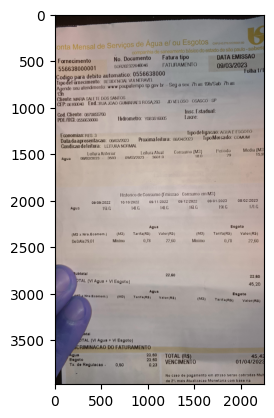

In [49]:
words = []
for contour in contours:
    x, y, w, h = cv2.boundingRect(contour)
    img_cropped = img_copy[y: y + h, x: x + w]
    words.append(pytesseract.image_to_string(img_cropped))

In [41]:
cep = re.compile(r'(cep:\s\d{8})|(\d{8})', re.IGNORECASE)
cliente = re.compile(r'(cliente:.[A-Za-z]{4,45}.[A-Za-z]{4,45}+)', re.IGNORECASE)
cpf_cnpj = re.compile(r'(cpf:.\d{3}\.\d{3}\.\d{3}\-\d{2})|(cnp.:.\d{2}\.\d{3}\.\d{3}\/\d{4}\-\d{2})', re.IGNORECASE)
endereco = re.compile(r'(rua.[a-z]+.[a-z]+.[a-z]+)', re.IGNORECASE)
r_dash = re.compile(r'(-)|(\|)|(\%)|(\()|(\))|(\/)|(nº)|(\d)\s', re.IGNORECASE)

In [42]:
text = ''.join(words).replace('\n', ' ')
text_without_dash = r_dash.sub('', text)
text_without_dash

'‘onta Mensal de Servigos de Agua e OU ESGOtOS ovessszresioooecompanhia de saneamento basico do estado de sao paulo  Fornecimento No. Documento _—Fatura tipo DATA EMI 55663800000GOR2023224604FATURAMENTO 09AsO  Codigo para debito automatico: 055663800Tipo defornecimento: RESIDENCAL VULNERAVEL Y anette seu atendimento www poupalempo sp.gov br  Seg sex 7h as 19tVSab 7has  {3h Cliente: MARIA SALETE DOS SANTOS  c CEP: 0516004End.:RUA JOAO GUIMARAES ROSA29JD VELOSO OSASCO” SP  Cod. Clente: 087085576Insc. Estadual: PDERGI: 055663300Ihdrometro: YO8S1600Lacre: Economias: RES. Tipo deligacao: AGUAE ESGOTO  Datadaapresentacao: 0903202Proximaleitura: 0804202~=—«“TipoMercado: CoMUM Condicaodeleitura: LEITURANORMAL  Leitura Anterior Leitura Atual Consume M3 Periodg Media M3 Agua 0802202 35809032023601.18.215,9 Historico de Consumo Emissao Consumo em M3  090920210102020911202091220209012020802202Agua 15LG \\41.G 14LG 16LG 191.G 1LG Agua Esgoto Mx Nro.Econom. M3 TarifaR$ ValorR$ M3 TarifaR$ ValorR$ De

In [43]:
print(cpf_cnpj.findall(text))
print(cep.findall(text_without_dash))
print(cliente.findall(text))
print(endereco.findall(text))

[]
[('', '55663800'), ('', '20232246'), ('', '05566380'), ('', '08708557'), ('', '05566330'), ('', '35809032'), ('', '09092021'), ('', '01020209'), ('', '11202091'), ('', '22020901'), ('', '20208022')]
['Cliente: MARIA SALETE']
['RUA JOAO GUIMARAES ROSA']


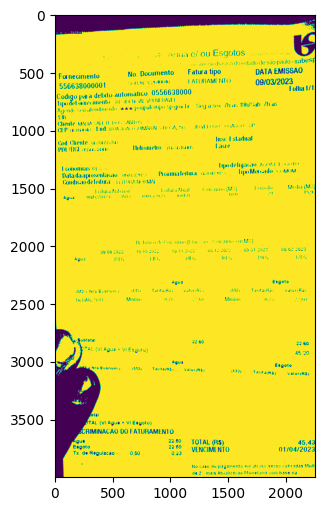

In [561]:
dilatacao = cv2.dilate(lim_otsu, kernel)
plt.figure(figsize=(10, 6))
plt.imshow(dilatacao)

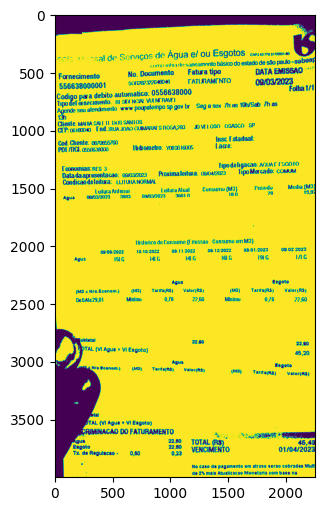

In [262]:
abertura = cv2.morphologyEx(lim_otsu, cv2.MORPH_OPEN, kernel)
plt.figure(figsize=(10, 6))
plt.imshow(abertura)

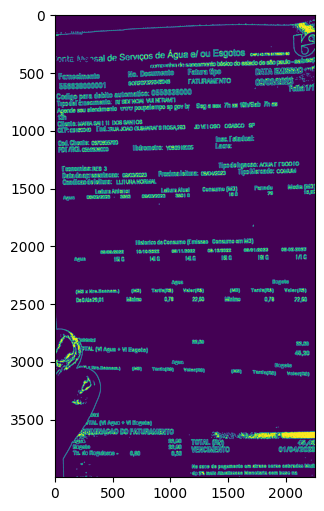

In [263]:
gradiente = cv2.morphologyEx(lim_otsu, cv2.MORPH_GRADIENT, kernel)
plt.figure(figsize=(10, 6))
plt.imshow(gradiente)

In [264]:
texto = pytesseract.image_to_string(img_crop, lang='por', config=pytesseract_config)
print(texto)

: sal d ' Água e/ ou ãlírfífftÚg CNPJ 43776 .517/0001-80 É
mpanhia de saneamento básico do estado de são paulo - sabeSF
Fornecimento No. Documento Fatura tipo DATA EMISSAO
556638000001 SOR2023226 46046 FATURAMENTO 09/03/2023
Codigo para debito automatico: 0556638000 Folha 1/1
Tlpoâef(unecmmnlo. RESIDENCIAL VULNERAVE
Agende seu atendimento: www poupatempo sp gov br - Segasex /h as 19h/Sab (h as
13h
Cliente: MARIA SALETE DOS SANTOS
CEP: osi60040 — End.:RUA JOAO GUIMARAES ROSAZES — D V LOSO OSASCO SP
Cod. Cliente: 0870855760 Insc. Estadual:
PDE/RGI: 0556638000 lhdrometro: Yog8s6 16005 Lacre:
Economias: RES. 3 ) Í Tipo de ligacão: AGUA E FSGOTO
Datadaapresentacaão: 09/03/2023 Proximaleitura: 08/04/2023 — TipoMercado: COMUM
Condicao deleitura: LEITURA NORMAL
Leitura Anterior Leitura Alual Consurrio (M3) Período Media (M3)
Agua DE/02/2023 - 93503 09/03/2023 36010 185.0 2D 15,95

